In [11]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [ ]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [ ]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [ ]:
# Write your code here

tapply(complete_data$measure, complete_data$site_name, mean)

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the boostrapping-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [ ]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


In [ ]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [ ]:
processOneIter = function(data_1, data_2){
  
  concat_data = c(data_1, data_2)
  len_concat_data = length(concat_data)
  
  len_data_1 = length(data_1)    
  shuffled_data = sample(concat_data)
  new_data_1 = shuffled_data[1:len_data_1]
  new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
  mean(new_data_1) - mean(new_data_2)
  
}
processOneIter(data_1$measure, data_2$measure)


In [ ]:
mean_under_null = replicate(1000, processOneIter(data_1$measure, data_2$measure))

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)



In [ ]:
observed_value = mean(data_1$measure) - mean(data_2$measure)

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)

sum(mean_under_null < observed_value) / length(mean_under_null)

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [5]:

sampleOneIteration = function(){
  true_proportions = c(0.60, 0.19, 0.21)
  sample_proportions = rmultinom(1, 200, prob=c(0.61, 0.19, 0.20))/200
  sample_tvd = sum(abs(true_proportions- sample_proportions))/2
  sample_tvd
  
}
sampleOneIteration()



[1] 0.065

In [7]:
# Compute and store the sample tvd to build the background distribution
tvds = replicate(1000, sampleOneIteration())



In [13]:


#Measure TVDS of observed value
observed_stat = sum(abs(c(0.61, 0.19, 0.21) - c(0.61, 0.19, 0.20)))/2
observed_stat




[1] 0.095

[1] 0.006

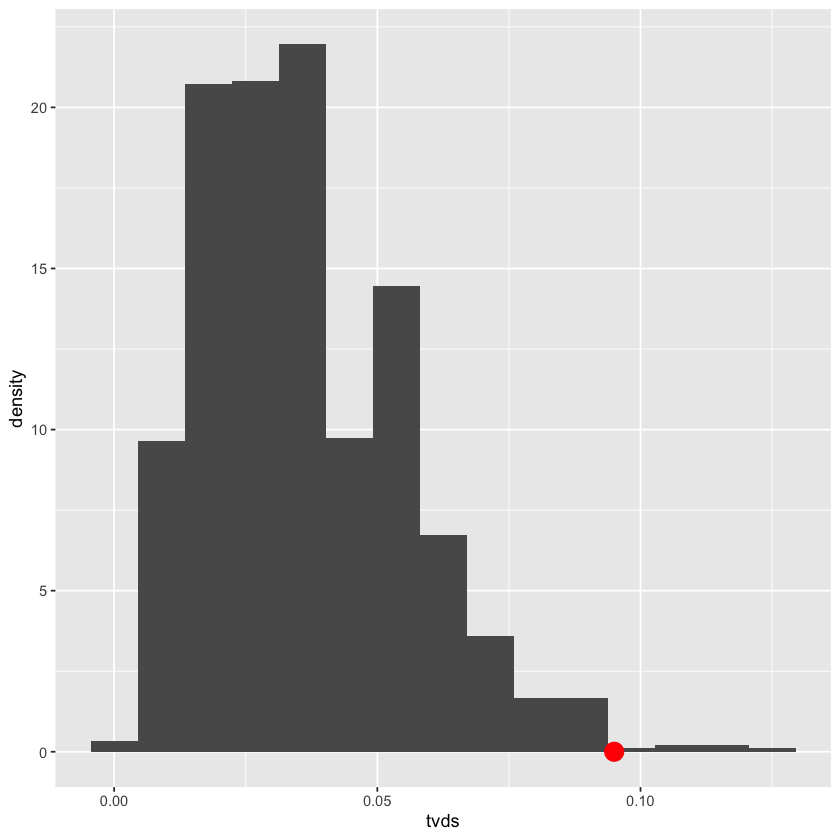

In [14]:
#Compare the observed value against the data simulated under the null hypothesi
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

#compute p-value
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value